In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Suicide_Detection.csv")
df

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [5]:
df.shape

(232074, 3)

In [6]:
new_df=df['class'].value_counts() 
new_df.head()

suicide        116037
non-suicide    116037
Name: class, dtype: int64

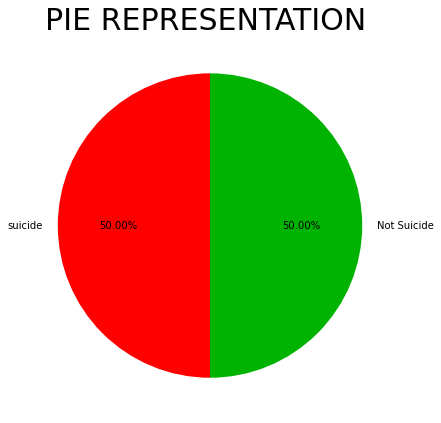

In [7]:
plt.figure(figsize=(7,7))
plt.pie(df['class'].value_counts(),startangle=90,colors=['#FF0000','#00B300'],autopct='%0.2f%%',labels=['suicide','Not Suicide'])
plt.title('PIE REPRESENTATION ',fontdict={'size':30})
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [9]:
!pip install neattext
import neattext.functions as nfx

In [10]:
from tqdm import tqdm

In [11]:
def clean_dataset(text):
    cleaned_dataset=[]
    for line in tqdm(text):
        line=line.lower()
        line=nfx.remove_special_characters(line)
        line=nfx.remove_stopwords(line)
        cleaned_dataset.append(line)
    return cleaned_dataset
df.text=clean_dataset(df.text)

100%|██████████| 232074/232074 [00:48<00:00, 4737.79it/s]


In [12]:
df

,Unnamed: 0,text,class
0,2,ex wife threatening suiciderecently left wife ...,suicide
1,3,weird dont affected compliments coming know ir...,non-suicide
2,4,finally 2020 hear 2020 bad year swear fucking ...,non-suicide
3,8,need helpjust help im crying hard,suicide
4,9,im losthello adam 16 ive struggling years im a...,suicide
...,...,...,...
232069,348103,dont like rock going httpsmusictastespacematch...,non-suicide
232070,348106,tell friends lonely deprived prebought little ...,non-suicide
232071,348107,pee probably tastes like salty tea drank pee c...,non-suicide
232072,348108,usual stuff find hereim posting sympathy pity ...,suicide


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
cols=['text','class']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [15]:
df.head

<bound method NDFrame.head of         Unnamed: 0    text  class
0                2   52432      1
1                3  220297      0
2                4   61422      0
3                8  145957      1
4                9  109454      1
...            ...     ...    ...
232069      348103   44832      0
232070      348106  190590      0
232071      348107  155671      0
232072      348108  208959      1
232073      348110   86324      0

[232074 rows x 3 columns]>

In [16]:
df_1=df.copy()

In [17]:
df_1.head

<bound method NDFrame.head of         Unnamed: 0    text  class
0                2   52432      1
1                3  220297      0
2                4   61422      0
3                8  145957      1
4                9  109454      1
...            ...     ...    ...
232069      348103   44832      0
232070      348106  190590      0
232071      348107  155671      0
232072      348108  208959      1
232073      348110   86324      0

[232074 rows x 3 columns]>

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_dataset,test_dataset=train_test_split(df,test_size=0.3)

In [20]:
train_dataset

,Unnamed: 0,text,class
114894,172666,162025,0
69219,103827,98116,0
18577,27981,138718,0
68894,103338,224596,1
165640,248541,137642,0
...,...,...,...
91317,137213,44142,1
142933,214489,134091,1
82498,123865,31547,0
193601,290635,80803,0


In [21]:
test_dataset

,Unnamed: 0,text,class
111177,167099,206467,0
10503,15786,226379,1
92710,139240,16488,1
147099,220746,223613,0
180968,271598,45604,0
...,...,...,...
25072,37661,186425,1
171953,258057,171657,1
204249,306456,166876,1
149282,224011,178646,1


In [22]:
inputs_1=train_dataset.drop(['class'],axis=1)
target_1=train_dataset['class'] 

In [23]:
inputs_2=test_dataset.drop(['class'],axis=1)
target_2=test_dataset['class']

# DECISION TREE

In [24]:
from sklearn import tree

In [25]:
model_1=tree.DecisionTreeClassifier()

In [26]:
model_1.fit(inputs_1,target_1)

DecisionTreeClassifier()

In [27]:
sr1=model_1.score(inputs_2,target_2)
print(sr1)

0.7105123306953162


In [28]:
model_1.predict([[104038,79820]])

array([0])

# SVM

In [29]:
from sklearn.svm import LinearSVC
model_2=LinearSVC()

In [30]:
model_2.fit(inputs_1, target_1)

C:\Users\FARZIZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [31]:
sr2=model_2.score(inputs_2,target_2)
print(sr2)

0.5017738391048935


# NAIVE BAYES

In [32]:
from sklearn.naive_bayes import GaussianNB
model_3=GaussianNB()

In [33]:
model_3.fit(inputs_1,target_1)

GaussianNB()

In [34]:
sr3=model_3.score(inputs_2, target_2)
print(sr3)

0.4886172672823636


# RANDOOM FOREST

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model_4=RandomForestClassifier()

In [37]:
model_4.fit(inputs_1,target_1)

RandomForestClassifier()

In [39]:
sr4=model_4.score(inputs_2, target_2)
print(sr4)

0.6947991324705917
